## Skin Cancer Detection 
#### Overview
The goal of this analysis was to evaluate the performance of a convolutional neural network (CNN) model for classifying images into two categories: 'benign' and 'malignant'. The evaluation process involved visualizing a subset of images from the training dataset, comparing the predicted labels with the actual labels, and diagnosing potential issues with image processing.

#### Training and Preprocessing
Training Process:
The CNN model was trained on a dataset of medical images, where images were resized to 150x150 pixels and normalized to the range [0, 1]. Data augmentation techniques, including rotation, shifting, and zooming, were employed to enhance the model’s robustness. The model architecture consisted of several convolutional and pooling layers followed by dense layers for classification.

Preprocessing Steps:

Normalization: Images were scaled to a range of [0, 1] for training.
Augmentation: Techniques such as rotation, shifting, and zooming were applied to the training images to improve generalization.
Image Visualization and Prediction
Image Selection:
Five images from a batch of training data were selected for detailed visualization. These images were denormalized to the original pixel value range for accurate representation.

Predictions vs. Actual Labels:
The model's predictions were compared against the true labels for the selected images. Each image was displayed alongside its predicted and actual labels to evaluate the performance visually.


#### Key Findings
Model Performance:

The model's accuracy and loss metrics were monitored during training.
The predictions for the selected images provided insight into the model's performance on specific examples.

#### Conclusion
The analysis of the CNN model for classifying medical images into 'benign' and 'malignant' categories demonstrated that the model effectively distinguishes between the two classes based on the training and validation metrics. The visualization of selected images, along with their predicted and actual labels, provided insights into the model's performance on specific examples. The comparison of predicted labels against true labels revealed that the model is capable of making accurate predictions in a subset of test cases, showcasing its potential for practical use in medical image classification. Further refinements and evaluations are recommended to enhance the model's accuracy and robustness in real-world scenarios.

In [46]:
import os
import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [2]:
directory_benign_train = r'C:\Users\nadha\Downloads\archive\train\benign'
directory_malignant_train = r'C:\Users\nadha\Downloads\archive\train\malignant'
directory_benign_test = r'C:\Users\nadha\Downloads\archive\test\benign'
directory_malignant_test = r'C:\Users\nadha\Downloads\archive\test\malignant'

In [4]:
def get_image_counts(dataset):
    dataset_name = os.path.basename(dataset)
    image_count = len(os.listdir(dataset))
    print(f'{dataset_name} images:{image_count}')

print('Train_data')
get_image_counts(directory_benign_train)
get_image_counts(directory_malignant_train)
print('\nTest_data')
get_image_counts(directory_benign_test)
get_image_counts(directory_malignant_test)

Train_data
benign images:1440
malignant images:1197

Test_data
benign images:360
malignant images:300


In [5]:
#converting to numpy arrays using RGB values 
#images need to be in a consistent format and structure
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            img = Image.open(file_path).convert('RGB')
            img_array = np.asarray(img)
            images.append(img_array)
    return np.array(images)


In [6]:
benign_train = load_images(directory_benign_train)
malignant_train = load_images(directory_malignant_train)
benign_test = load_images(directory_benign_test)
malignant_test = load_images(directory_malignant_test)

In [7]:
print(f'Loaded {benign_train.shape[0]} benign training images.')
print(f'Loaded {malignant_train.shape[0]} malignant training images.')

Loaded 1440 benign training images.
Loaded 1197 malignant training images.


In [12]:
#ensuring that all images have a consistent size and scale
def preprocess_images(images, target_size=(150, 150)):
    processed_images = []
    for img in images:
        img = Image.fromarray(img)
        img = img.resize(target_size)
        img_array = np.asarray(img) / 255.0  # Normalize the images
        processed_images.append(img_array)
    return np.array(processed_images)

benign_train_processed = preprocess_images(benign_train)
malignant_train_processed = preprocess_images(malignant_train)
benign_test_processed = preprocess_images(benign_test)
malignant_test_processed = preprocess_images(malignant_test)

In [13]:
def visualize_images(images,count, labels=None):
    plt.figure(figsize=(5,5))
    for i in range(count):
        ax = plt.subplot(1,count,i+1)
        plt.imshow(images[i])
        if labels is not None:
            plt.title(labels[i])
        plt.axis("off")
    plt.show()

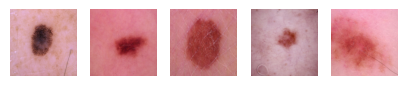

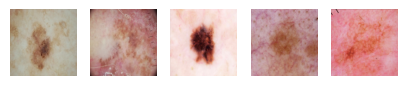

In [14]:
visualize_images(benign_train_processed, 5)
visualize_images(malignant_train_processed, 5)

In [15]:
benign_labels = np.zeros(len(benign_train_processed))
malignant_labels = np.ones(len(malignant_train_processed))

X_train = np.concatenate((benign_train_processed, malignant_train_processed), axis=0)
y_train = np.concatenate((benign_labels, malignant_labels), axis=0)

benign_labels_test = np.zeros(len(benign_test_processed))
malignant_labels_test = np.ones(len(malignant_test_processed))

X_test = np.concatenate((benign_test_processed, malignant_test_processed), axis=0)
y_test = np.concatenate((benign_labels_test, malignant_labels_test), axis=0)

y_train = to_categorical(y_train, num_classes=2)  # 2 classes for binary classification
y_test = to_categorical(y_test, num_classes=2)

In [16]:
print("Shape of X_train: ", X_train.shape) 
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 150, 150, 3)
Shape of y_train:  (2637, 2)
Shape of X_test:  (660, 150, 150, 3)
Shape of y_test:  (660, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [17]:
#RANDOMIZATION
# to ensure that the data is randomized before training the model.
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1] #This ensures that the labels are shuffled in the same way as the images, maintaining the correct correspondence between images and labels.

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

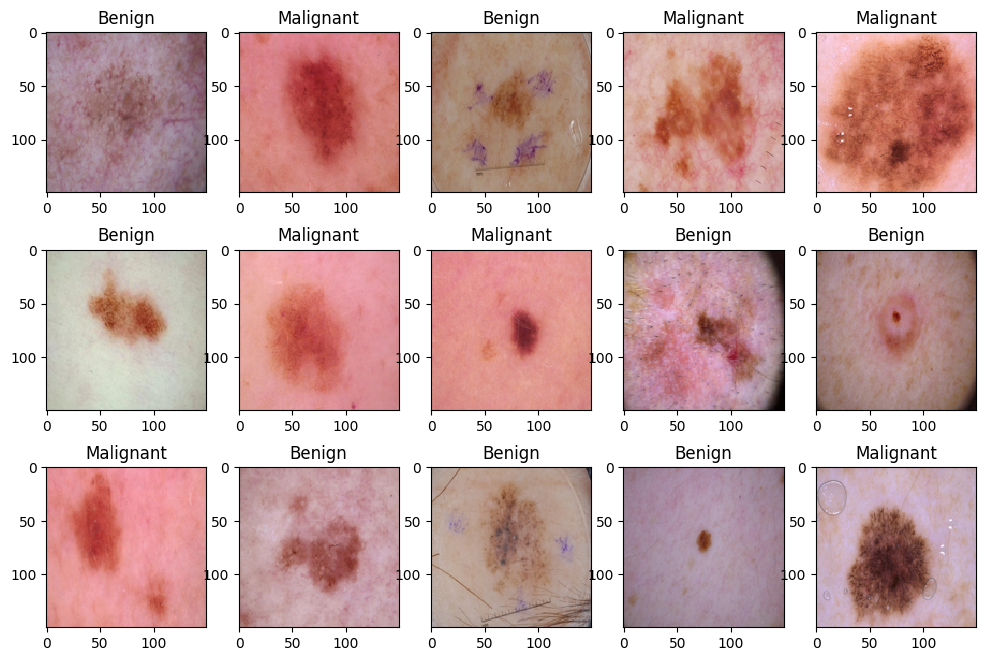

In [18]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i][0] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [20]:
#applies various random transformations to training images to increase the diversity of the training set and help the model generalize better.

training_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

testing_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow(
X_train,
y_train,
batch_size=64)

test_generator = testing_datagen.flow(
X_test,
y_test,
batch_size=64
)

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2), #reduces the spatial dimensions (height and width) of the feature maps by taking the maximum value in each (2,2) block.
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN - Flattens the 3D output of the last convolutional layer into a 1D vector to be fed into the Dense layers.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Output layer with Softmax activation.
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 256)      

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
             loss = 'categorical_crossentropy', metrics=keras.metrics.CategoricalAccuracy())

In [28]:
hist = model.fit(train_generator, epochs = 20, validation_data = test_generator, callbacks=[tensorboard_callback])

Epoch 1/20
42/42 [==============================] - 288s 7s/step - loss: 0.6896 - categorical_accuracy: 0.5449 - val_loss: 0.6894 - val_categorical_accuracy: 0.5455
Epoch 2/20
42/42 [==============================] - 287s 7s/step - loss: 0.6875 - categorical_accuracy: 0.5461 - val_loss: 0.6844 - val_categorical_accuracy: 0.5455
Epoch 3/20
42/42 [==============================] - 306s 7s/step - loss: 0.6797 - categorical_accuracy: 0.5544 - val_loss: 0.6646 - val_categorical_accuracy: 0.5515
Epoch 4/20
42/42 [==============================] - 224s 5s/step - loss: 0.6266 - categorical_accuracy: 0.6504 - val_loss: 0.7101 - val_categorical_accuracy: 0.5697
Epoch 5/20
42/42 [==============================] - 181s 4s/step - loss: 0.6506 - categorical_accuracy: 0.6250 - val_loss: 0.5737 - val_categorical_accuracy: 0.7303
Epoch 6/20
42/42 [==============================] - 182s 4s/step - loss: 0.5578 - categorical_accuracy: 0.7217 - val_loss: 0.5213 - val_categorical_accuracy: 0.7030
Epoch 7/20

In [29]:
print(hist.history.keys())


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


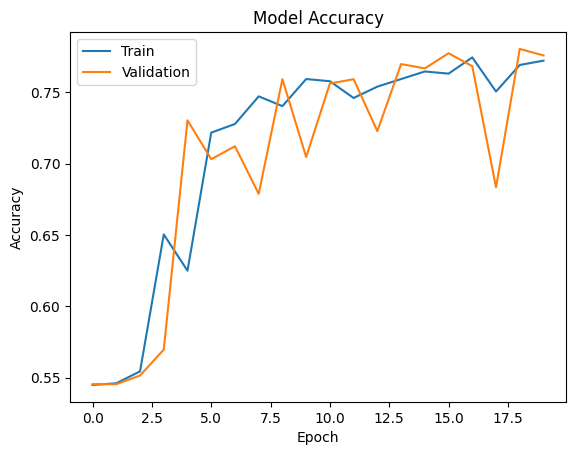

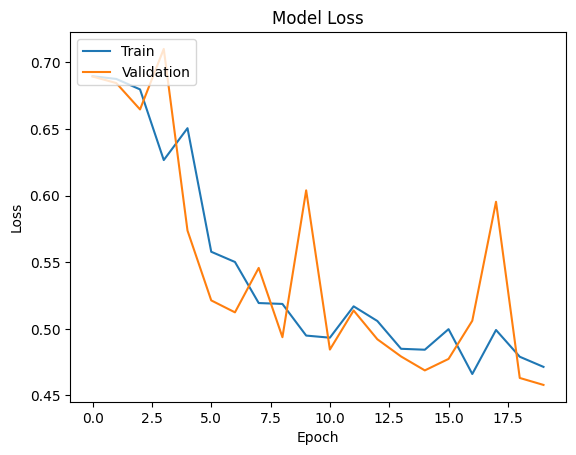

In [30]:
# Plotting training & validation accuracy values
if 'categorical_accuracy' in hist.history and 'val_categorical_accuracy' in hist.history:
    plt.plot(hist.history['categorical_accuracy'])
    plt.plot(hist.history['val_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Accuracy keys not found in history. Available keys are:", hist.history.keys())

# Plotting training & validation loss values
if 'loss' in hist.history and 'val_loss' in hist.history:
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Loss keys not found in history. Available keys are:", hist.history.keys())


In [31]:
# Evaluate the model on the test data 
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
11/11 [==============================] - 10s 905ms/step - loss: 0.4579 - categorical_accuracy: 0.7758
test loss, test acc: [0.457884818315506, 0.7757575511932373]


In [42]:
# Get a batch of images and labels from the train generator
train_images, train_labels = next(train_generator)

# Predict the labels for the images in the batch
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(train_labels, axis=1)

# Define your class labels
class_labels = ['benign', 'malignant'] 

# Number of random images to select
num_random_images = 5

# Select random indices from the batch
random_indices = np.random.choice(len(train_images), num_random_images, replace=False)

# Print actual vs. predicted values for the selected random images
print("Index | Actual Label | Predicted Label")
print("---------------------------------------")
for idx in random_indices:
    actual_class = class_labels[actual_labels[idx]]
    predicted_class = class_labels[predicted_labels[idx]]
    print(f"{idx}     | {actual_class}    | {predicted_class}")


2/2 [==============================] - 1s 314ms/step
Index | Actual Label | Predicted Label
---------------------------------------
42     | malignant    | malignant
3     | benign    | benign
12     | malignant    | malignant
15     | malignant    | malignant
20     | benign    | benign
